# Hospital Readmission.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

In [3]:
db=pd.read_csv('diabetic_data.csv')
db

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


# Preprocessing

In [4]:
#check if null
for col in db.columns:
    if db[col].dtype == object:
         print(col,db[col][db[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [5]:
#Gender has different form of missing value than the others
print('gender', db['gender'][db['gender'] == 'Unknown/Invalid'].count()) 

gender 3


In [6]:
db.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [7]:
db.shape

(101766, 50)

In [8]:
db.nunique()

encounter_id                101766
patient_nbr                  71518
race                             6
gender                           3
age                             10
weight                          10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      18
medical_specialty               73
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         717
diag_2                         749
diag_3                         790
number_diagnoses                16
max_glu_serum                    4
A1Cresult                        4
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride         

In [9]:
#drop unrelated & columns that have so many missing data
#Eventhough medical_specialty 	 has a lot of missing data,
#I decided not to drop it, assuming that medical_specialty might have some effect on complications 
#that will lead patient readmission,

db=db.drop(['weight','payer_code'],axis=1)

In [10]:
#Separate columns in to datatype.
db_obj=db.select_dtypes(include=[object, "?"])
db_int=db.select_dtypes(include=[int, "?"])
db_obj.head()

,race,gender,age,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),Pediatrics-Endocrinology,250.83,?,?,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),?,276,250.01,255,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),?,648,250,V27,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),?,8,250.43,403,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),?,197,157,250,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [11]:
#removing ? value to none,no or 0 depends on the context of the column
db_obj['race']=db_obj['race'].replace('?','None')
db_obj['gender']=db_obj['gender'].replace('?','None')
db_obj['max_glu_serum']=db_obj['max_glu_serum'].replace('?','None')
db_obj['A1Cresult']=db_obj['A1Cresult'].replace('?','None')

db_obj['diag_1']=db_obj['diag_1'].replace('?','0')
db_obj['diag_2']=db_obj['diag_2'].replace('?','0')
db_obj['diag_3']=db_obj['diag_3'].replace('?','0')

for i in range(0,10):
    db_obj['age'] = db_obj['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', (i+1)*10-5)
db_obj['age'].value_counts()

db_obj=db_obj.replace('?','No')
db_obj['gender']=db_obj['gender'].replace('Unknown/Invalid','Female')

<ipython-input-11-dd1075f8d4c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_obj['race']=db_obj['race'].replace('?','None')
<ipython-input-11-dd1075f8d4c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_obj['gender']=db_obj['gender'].replace('?','None')
<ipython-input-11-dd1075f8d4c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

# Feature Engineering

In [12]:
#change diag_nosed values into category.

#remove strings in the value and change class to float.
db_obj['diag_1']=db_obj['diag_1'].str.replace(r'\D', '')
db_obj['diag_2']=db_obj['diag_2'].str.replace(r'\D', '')
db_obj['diag_3']=db_obj['diag_3'].str.replace(r'\D', '')
db_obj['diag_1']=db_obj['diag_1'].astype(float)
db_obj['diag_2']=db_obj['diag_2'].astype(float)
db_obj['diag_3']=db_obj['diag_3'].astype(float)

for index, row in db_obj.iterrows():
    if (row['diag_1'] >= 390 and row['diag_1'] < 460) or (np.floor(row['diag_1']) == 785):
        db_obj.loc[index, 'diag_1'] = 'Circulatory'
    elif (row['diag_1'] >= 460 and row['diag_1'] < 520) or (np.floor(row['diag_1']) == 786):
        db_obj.loc[index, 'diag_1'] = 'Respiratory'
    elif (row['diag_1'] >= 520 and row['diag_1'] < 580) or (np.floor(row['diag_1']) == 787):
        db_obj.loc[index, 'diag_1'] = 'Digestive'
    elif (np.floor(row['diag_1']) == 250):
        db_obj.loc[index, 'diag_1'] = 'Diabetes'
    elif (row['diag_1'] >= 800 and row['diag_1'] < 1000):
        db_obj.loc[index, 'diag_1'] = 'Injury'
    elif (row['diag_1'] >= 710 and row['diag_1'] < 740):
        db_obj.loc[index, 'diag_1'] = 'Musculoskeletal'
    elif (row['diag_1'] >= 580 and row['diag_1'] < 630) or (np.floor(row['diag_1']) == 788):
        db_obj.loc[index, 'diag_1'] = 'Genitourinary'
    elif (row['diag_1'] >= 140 and row['diag_1'] < 240):
        db_obj.loc[index, 'diag_1'] = 'Neoplasms'
    else:
        db_obj.loc[index, 'diag_1'] = 'Other'

       
    if (row['diag_2'] >= 390 and row['diag_2'] < 460) or (np.floor(row['diag_2']) == 785):
        db_obj.loc[index, 'diag_2'] = 'Circulatory'
    elif (row['diag_2'] >= 460 and row['diag_2'] < 520) or (np.floor(row['diag_2']) == 786):
        db_obj.loc[index, 'diag_2'] = 'Respiratory'
    elif (row['diag_2'] >= 520 and row['diag_2'] < 580) or (np.floor(row['diag_2']) == 787):
        db_obj.loc[index, 'diag_2'] = 'Digestive'
    elif (np.floor(row['diag_2']) == 250):
        db_obj.loc[index, 'diag_2'] = 'Diabetes'
    elif (row['diag_2'] >= 800 and row['diag_2'] < 1000):
        db_obj.loc[index, 'diag_2'] = 'Injury'
    elif (row['diag_2'] >= 710 and row['diag_2'] < 740):
        db_obj.loc[index, 'diag_2'] = 'Musculoskeletal'
    elif (row['diag_2'] >= 580 and row['diag_2'] < 630) or (np.floor(row['diag_2']) == 788):
        db_obj.loc[index, 'diag_2'] = 'Genitourinary'
    elif (row['diag_2'] >= 140 and row['diag_2'] < 240):
        db_obj.loc[index, 'diag_2'] = 'Neoplasms'
    else:
        db_obj.loc[index, 'diag_2'] = 'Other'
    
    if (row['diag_3'] >= 390 and row['diag_3'] < 460) or (np.floor(row['diag_3']) == 785):
        db_obj.loc[index, 'diag_3'] = 'Circulatory'
    elif (row['diag_3'] >= 460 and row['diag_3'] < 520) or (np.floor(row['diag_3']) == 786):
        db_obj.loc[index, 'diag_3'] = 'Respiratory'
    elif (row['diag_3'] >= 520 and row['diag_3'] < 580) or (np.floor(row['diag_3']) == 787):
        db_obj.loc[index, 'diag_3'] = 'Digestive'
    elif (np.floor(row['diag_3']) == 250):
        db_obj.loc[index, 'diag_3'] = 'Diabetes'
    elif (row['diag_3'] >= 800 and row['diag_3'] < 1000):
        db_obj.loc[index, 'diag_3'] = 'Injury'
    elif (row['diag_3'] >= 710 and row['diag_3'] < 740):
        db_obj.loc[index, 'diag_3'] = 'Musculoskeletal'
    elif (row['diag_3'] >= 580 and row['diag_3'] < 630) or (np.floor(row['diag_3']) == 788):
        db_obj.loc[index, 'diag_3'] = 'Genitourinary'
    elif (row['diag_3'] >= 140 and row['diag_3'] < 240):
        db_obj.loc[index, 'diag_3'] = 'Neoplasms'
    else:
        db_obj.loc[index, 'diag_3'] = 'Other'

In [13]:
#concatenate int dataframe with str dataframe.
dc=pd.concat([db_int,db_obj],axis=1)

In [14]:
#Originally, readmission status has 3 category as none, readmitted in 30days, and after 30days.
#presuming that readmitted after 30 days indicate the care works better than those who readmitted in 30days,
#the original data column stays, but creating another column to make it boolean category 
#as readmitted or not will be pretty much helpful for future prediction.
dc['readmission']=dc['readmitted'].replace('>30','Yes').replace('<30','Yes')

# Visualization

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


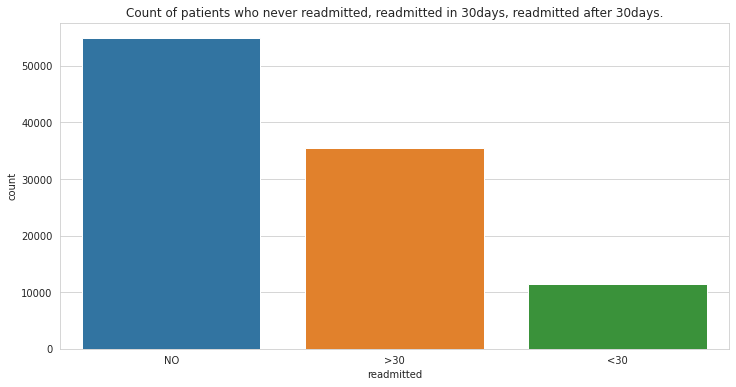

In [15]:
#count of patients who never readmitted, readmitted in 30days, readmitted after 30 days.
plt.figure(figsize=(12,6))
sns.countplot(dc['readmitted'])
plt.title('Count of patients who never readmitted, readmitted in 30days, readmitted after 30days.')
plt.show()

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


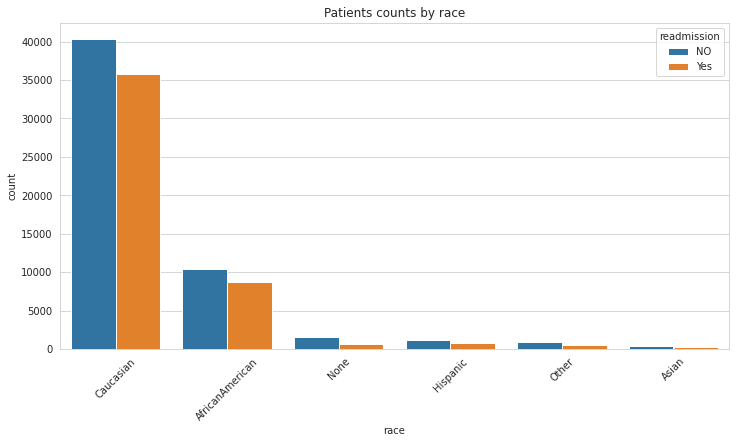

In [16]:
#counts of patients who visited hospital by race
dcrasum = dc.groupby(["race"]).count().sort_values('encounter_id',ascending=False).index
plt.figure(figsize=(12,6))
sns.countplot(dc['race'],order=dcrasum,hue=dc['readmission'])
plt.xticks(rotation=45)
plt.title('Patients counts by race')
plt.show()

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


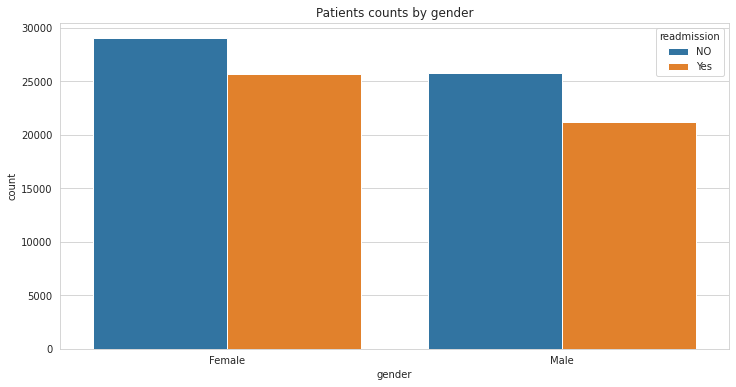

In [17]:
#counts patients by gender
dc['gender']=dc['gender'].replace('Unknown/Invalid','Female')
plt.figure(figsize=(12,6))
sns.countplot(dc['gender'],hue=dc['readmission']).set_title('Patients counts by gender')
plt.show()

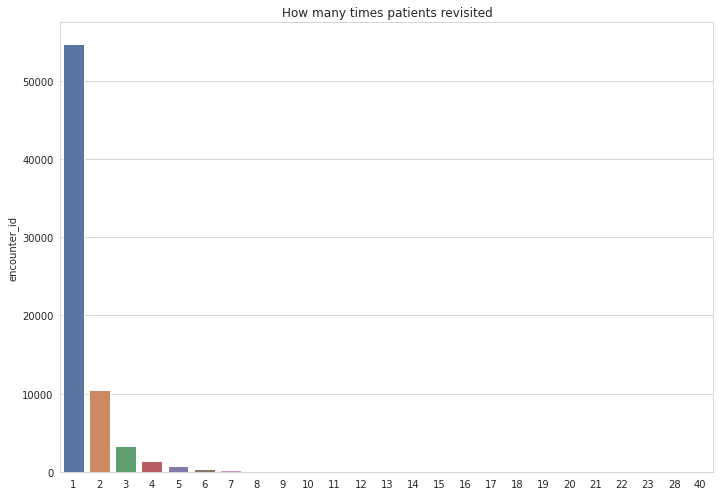

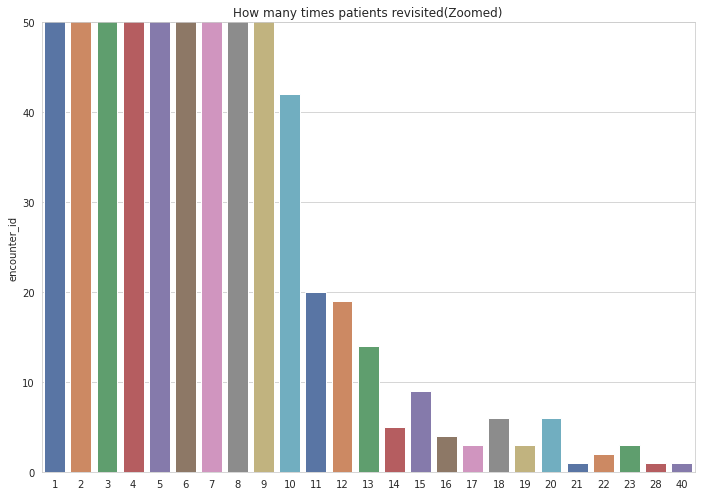

In [18]:
#count how many patients visited hospital again how many times.
rere=dc.groupby(['patient_nbr']).count()
rerec=rere['encounter_id'].value_counts()
x=rerec.index
y=rerec

sns.set_style("whitegrid")

fig2, ax2 = plt.subplots()
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
fig2.set_size_inches(11.7, 8.27)
sns.set_theme(style="ticks")

sns.barplot(x=x,y=y, palette="deep",ax=ax2).set_title('How many times patients revisited')
sns.barplot(x=x,y=y, palette="deep",ax=ax).set_title('How many times patients revisited(Zoomed)')

ax.set_ylim(ymax=50)
plt.show()

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


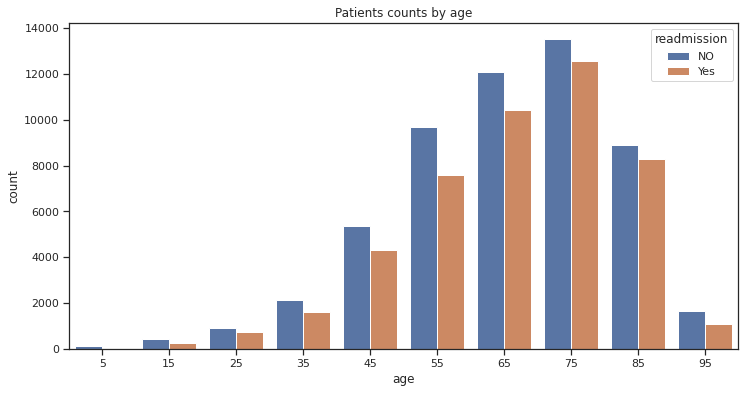

In [19]:
#counts of patients by age
plt.figure(figsize=(12,6))
sns.countplot(dc['age'],hue=dc['readmission']).set_title('Patients counts by age')
plt.show()

[Text(0, 0, 'Other'),
 Text(0, 0, 'Circulatory'),
 Text(0, 0, 'Diabetes'),
 Text(0, 0, 'Respiratory'),
 Text(0, 0, 'Injury'),
 Text(0, 0, 'Neoplasms'),
 Text(0, 0, 'Genitourinary'),
 Text(0, 0, 'Musculoskeletal'),
 Text(0, 0, 'Digestive')]

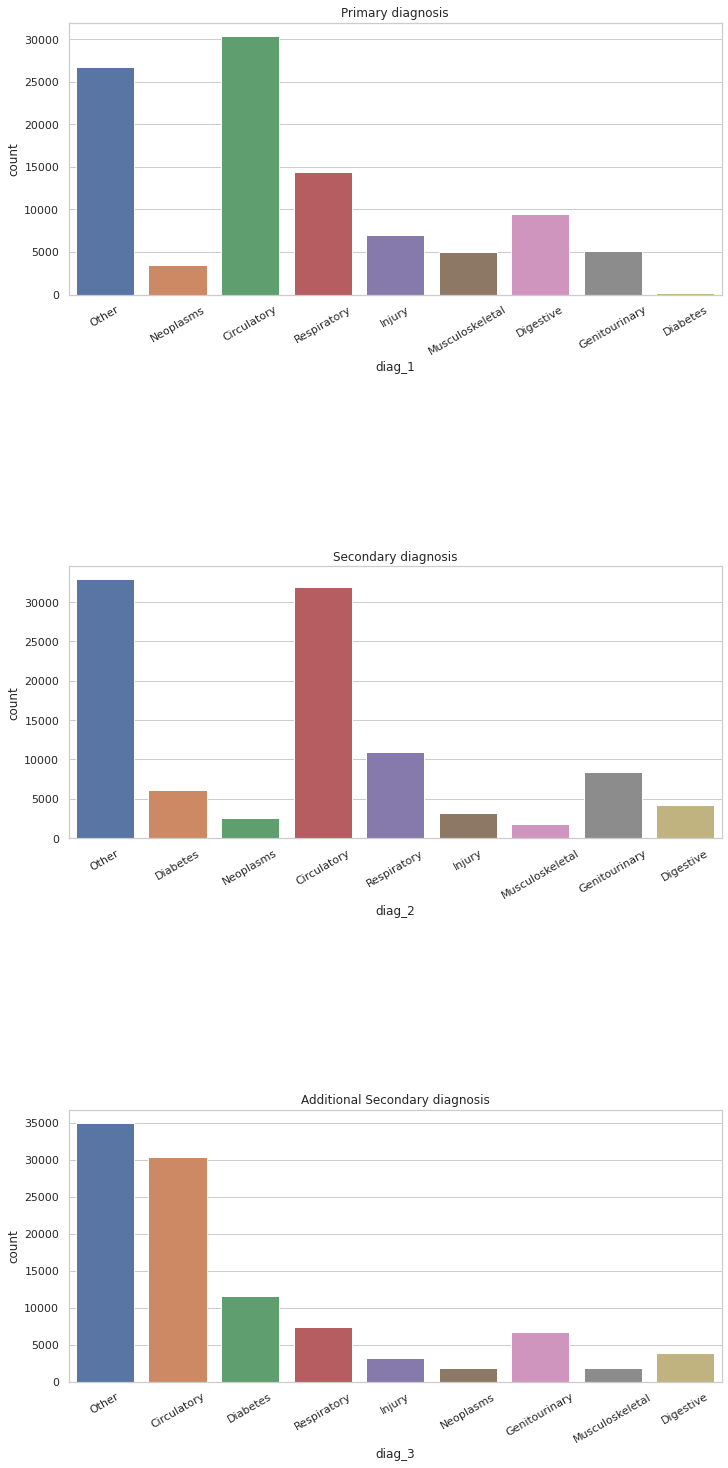

In [20]:
#count of primary, secondary diagnosis.
sns.set_style("whitegrid")

fig, [ax,ax2,ax3] = plt.subplots(3,1)

fig.set_size_inches(11.7, 25)
plt.subplots_adjust(hspace=1)

sns.countplot(x=dc['diag_1'], palette="deep",ax=ax).set_title('Primary diagnosis')
sns.countplot(x=dc['diag_2'], palette="deep",ax=ax2).set_title('Secondary diagnosis')
sns.countplot(x=dc['diag_3'], palette="deep",ax=ax3).set_title('Additional Secondary diagnosis')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 30)
ax3.set_xticklabels(ax3.get_xticklabels(),rotation = 30)


/anaconda/envs/azureml_py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


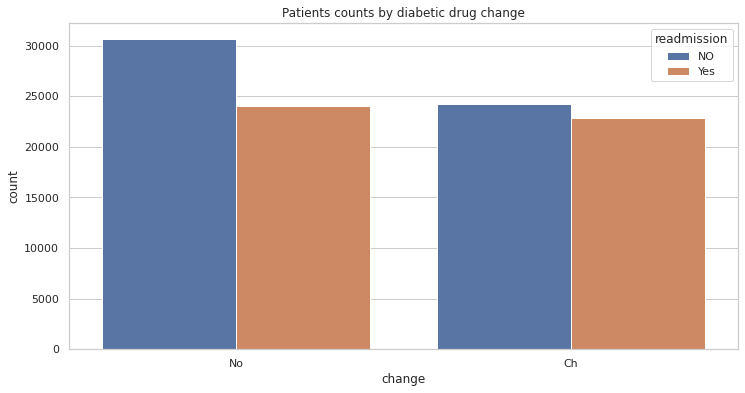

In [21]:
#Counts of patients by diabetic drug change
plt.figure(figsize=(12,6))
sns.countplot(dc['change'],hue=dc['readmission']).set_title('Patients counts by diabetic drug change')
plt.show()

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


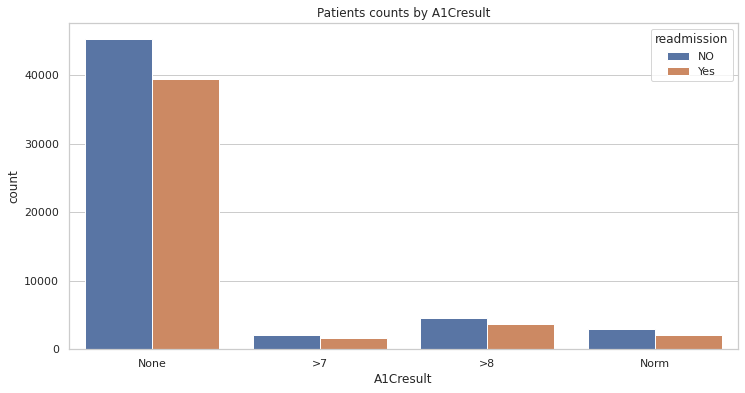

In [22]:
#Counts of patients by A1C result
plt.figure(figsize=(12,6))
sns.countplot(dc['A1Cresult'],hue=dc['readmission']).set_title('Patients counts by A1Cresult')
plt.show()

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


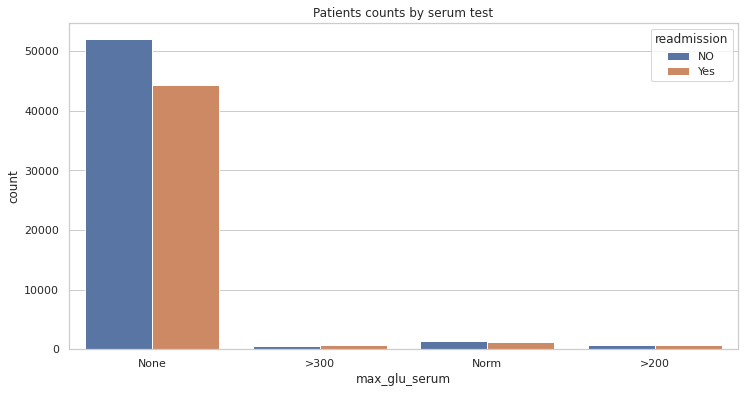

In [23]:
#Counts of patients by max glu serum test result
plt.figure(figsize=(12,6))
sns.countplot(dc['max_glu_serum'],hue=dc['readmission']).set_title('Patients counts by serum test')
plt.show()

# Machine Learning with AzureML

In [24]:
#Now readmitted column must be removed, otherwise it will be overfitted & dropping unncecessary columns on ML
dc=dc.drop(['readmitted','encounter_id',
'patient_nbr'],axis=1)

In [25]:
#import azureml package and define experiment name and workspace
from azureml.core.experiment import Experiment
from azureml.core.workspace import Workspace

ws= Workspace.from_config()

experiment_name = 'hospital_readmission'

experiment=Experiment(ws, experiment_name)



In [26]:
#Since azureml doens't allow pandas dataframe to run automl, change the data type to Tabular
from azureml.core import Dataset
datastore = ws.get_default_datastore()
dataset = Dataset.Tabular.register_pandas_dataframe(dc, datastore, "dataset_from_pandas_df", show_progress=True)
dc.to_csv('process')

Validating arguments.
Arguments validated.
Successfully obtained datastore reference and path.
Uploading file to managed-dataset/a7f956d8-27e0-44b0-b494-47155f1ba7ed/
Successfully uploaded file to datastore.
Creating and registering a new dataset.
Successfully created and registered a new dataset.


In [27]:
#show transformed dataframe
dataset.take(10).to_pandas_dataframe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race,gender,age,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmission
0,6,25,1,1,41,0,1,0,0,0,1,Caucasian,Female,5,Pediatrics-Endocrinology,Other,Other,Other,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,1,1,7,3,59,0,18,0,0,0,9,Caucasian,Female,15,No,Other,Other,Other,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,Yes
2,1,1,7,2,11,5,13,2,0,1,6,AfricanAmerican,Female,25,No,Other,Diabetes,Other,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,1,1,7,2,44,1,16,0,0,0,7,Caucasian,Male,35,No,Other,Other,Circulatory,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,1,1,7,1,51,0,8,0,0,0,5,Caucasian,Male,45,No,Neoplasms,Neoplasms,Diabetes,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,2,1,2,3,31,6,16,0,0,0,9,Caucasian,Male,55,No,Circulatory,Circulatory,Diabetes,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,Yes
6,3,1,2,4,70,1,21,0,0,0,7,Caucasian,Male,65,No,Circulatory,Circulatory,Other,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,1,1,7,5,73,0,12,0,0,0,8,Caucasian,Male,75,No,Circulatory,Respiratory,Diabetes,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes
8,2,1,4,13,68,2,28,0,0,0,8,Caucasian,Female,85,No,Circulatory,Circulatory,Other,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,3,3,4,12,33,3,18,0,0,0,8,Caucasian,Female,95,InternalMedicine,Circulatory,Neoplasms,Respiratory,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [28]:
#Define computing method as lowest end cpu cluster as we do not need much to compute
from azureml.core.compute import ComputeTarget, AmlCompute
from azureml.core.compute_target import ComputeTargetException

   # Choose a name for your CPU cluster
cpu_cluster_name = "cpu-cluster"

   # Verify that cluster does not exist already
try:
    cpu_cluster = ComputeTarget(workspace=ws, name=cpu_cluster_name)
    print('Found existing cluster, use it.')
except ComputeTargetException:
    compute_config = AmlCompute.provisioning_configuration(vm_size='STANDARD_D2_V2',
                                                              max_nodes=4)
    cpu_cluster = ComputeTarget.create(ws, cpu_cluster_name, compute_config)

cpu_cluster.wait_for_completion(show_output=True)

Found existing cluster, use it.
Succeeded
AmlCompute wait for completion finished

Minimum number of nodes requested have been provisioned


In [29]:
#Setting up traning config as classification
from azureml.train.automl import AutoMLConfig
automl_settings = {
    "experiment_timeout_hours" : 0.25,
    "enable_early_stopping" : True,
    "iteration_timeout_minutes" : 10,
    "max_concurrent_iterations" : 8,
    "max_cores_per_iteration" : -1,
    "primary_metric": 'AUC_weighted'
}

automl_config=AutoMLConfig(task='classification',
                           compute_target=cpu_cluster,
                           training_data=dataset,
                           label_column_name='readmission',
                           n_cross_validations=5,
                           **automl_settings
                           )

In [30]:
#excute run and monitor(widgets has currently issue between jupyter and Azure)
from azureml.widgets import RunDetails


remote_run = experiment.submit(automl_config, show_output = True)
# monitor the run
RunDetails(remote_run).show()


Submitting remote run.
No run_configuration provided, running on cpu-cluster with default configuration
Running on remote compute: cpu-cluster


Experiment,Id,Type,Status,Details Page,Docs Page
hospital_readmission,AutoML_937b1a39-99ef-4981-b21c-91473f537548,automl,NotStarted,Link to Azure Machine Learning studio,Link to Documentation



Current status: FeaturesGeneration. Generating features for the dataset.
Current status: DatasetFeaturization. Beginning to fit featurizers and featurize the dataset.
Current status: DatasetCrossValidationSplit. Generating individually featurized CV splits.
Current status: ModelSelection. Beginning model selection.

********************************************************************************************
DATA GUARDRAILS: 

TYPE:         Class balancing detection
STATUS:       PASSED
DESCRIPTION:  Your inputs were analyzed, and all classes are balanced in your training data.
              Learn more about imbalanced data: https://aka.ms/AutomatedMLImbalancedData

********************************************************************************************

TYPE:         Missing feature values imputation
STATUS:       PASSED
DESCRIPTION:  No feature missing values were detected in the training data.
              Learn more about missing value imputation: https://aka.ms/AutomatedMLFea

_AutoMLWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO', 's…

In [31]:
#print the result of the run
remote_run.wait_for_completion()
metrics = remote_run.get_metrics()
print(metrics)

{'experiment_status': ['DatasetEvaluation', 'FeaturesGeneration', 'DatasetFeaturization', 'DatasetFeaturizationCompleted', 'DatasetCrossValidationSplit', 'ModelSelection'], 'experiment_status_description': ['Gathering dataset statistics.', 'Generating features for the dataset.', 'Beginning to fit featurizers and featurize the dataset.', 'Completed fit featurizers and featurizing the dataset.', 'Generating individually featurized CV splits.', 'Beginning model selection.'], 'matthews_correlation': 0.28507807401899166, 'precision_score_macro': 0.6449183721056455, 'average_precision_score_macro': 0.6979169733307664, 'precision_score_weighted': 0.6457811136967809, 'f1_score_weighted': 0.6440592417168256, 'weighted_accuracy': 0.6536658837908129, 'f1_score_macro': 0.6402046443645955, 'log_loss': 0.6216703406299414, 'precision_score_micro': 0.6469744655836956, 'AUC_micro': 0.7070374095015545, 'norm_macro_recall': 0.2803998743135031, 'average_precision_score_weighted': 0.7006878536756532, 'reca

In [32]:
#find a best run
best_run, fitted_model = remote_run.get_output()
fitted_model

PipelineWithYTransformations(Pipeline={'memory': None,
                                       'steps': [('datatransformer',
                                                  DataTransformer(enable_dnn=False, enable_feature_sweeping=True, feature_sweeping_config={}, feature_sweeping_timeout=86400, featurization_config=None, force_text_dnn=False, is_cross_validation=True, is_onnx_compatible=False, observer=None, task='classification', working_dir='/mn...
                                                  StackEnsembleClassifier(base_learners=[('0', Pipeline(memory=None, steps=[('maxabsscaler', MaxAbsScaler(copy=True)), ('lightgbmclassifier', LightGBMClassifier(min_data_in_leaf=20, n_jobs=-1, problem_info=ProblemInfo(gpu_training_param_dict={'processing_unit_type': 'cpu'}), random_state=None))], verbose=False)), ('1', Pipeline(memory=None, steps=[('maxabsscaler', MaxAbsScaler(copy=True)), ('xgboostclassifier', XGBoostClassifier(n_jobs=0, problem_info=ProblemInfo(gpu_training_param_dict={'p

In [33]:
#register my model
from azureml.core.run import Run
print(fitted_model.steps)

model_name = best_run.properties['model_name']
description = 'Hospital Readmission Classification Model'
tags = None

model = remote_run.register_model(model_name = model_name, 
                           description = description, 
                           tags = tags)

[('datatransformer', DataTransformer(enable_dnn=False, enable_feature_sweeping=True, feature_sweeping_config={}, feature_sweeping_timeout=86400, featurization_config=None, force_text_dnn=False, is_cross_validation=True, is_onnx_compatible=False, task='classification')), ('stackensembleclassifier', StackEnsembleClassifier(base_learners=[('0', Pipeline(memory=None, steps=[('maxabsscaler', MaxAbsScaler(copy=True)), ('lightgbmclassifier', LightGBMClassifier(min_data_in_leaf=20, n_jobs=-1, problem_info=ProblemInfo(gpu_training_param_dict={'processing_unit_type': 'cpu'}), random_state=None))], verbose=False)), ('1', Pipeline(memory=None, steps=[('maxabsscaler', MaxAbsScaler(copy=True)), ('xgboostclassifier', XGBoostClassifier(n_jobs=0, problem_info=ProblemInfo(gpu_training_param_dict={'processing_unit_type': 'cpu'}), random_state=0, tree_method='auto'))], verbose=False)), ('16', Pipeline(memory=None, steps=[('maxabsscaler', MaxAbsScaler(copy=True)), ('logisticregression', LogisticRegression(

In [34]:
#Web Endpoint of the best run : http://5d382d9d-35ce-4326-a350-703df281c2a4.westus2.azurecontainer.io/score